In [105]:
import pandas as pd 
import matplotlib.pyplot as plt
import pandas.api.types as api
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import  warnings
warnings.simplefilter(action='ignore', category=[FutureWarning,UserWarning])

np.random.seed(0)

3D

In [106]:
data=pd.read_csv("/home/batuhan-saylam/Desktop/cbddotasks/cbddotask3/Car details v3(1).csv",na_values=[pd.NA,np.nan,'',' '])
data.drop_duplicates()
data["mileage"]=data["mileage"].str.replace(" kmpl","")
data["mileage"]=data["mileage"].str.replace(" km/kg","").apply(float)
data["engine"]=data["engine"].str.replace(" CC","").apply(float)
data["engine"]=data["engine"].replace(" CC","").apply(str)
data["max_power"]=data["max_power"].str.replace(" bhp","")
data["max_power"]=data["max_power"].replace('',"0").apply(float)
data=data.drop("torque",axis=1)

In [107]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [108]:
chosen_idx = np.random.choice(data.index, replace=False, size=100)
data=data.loc[chosen_idx,:]
data.shape

(100, 12)

In [109]:
data=data[["selling_price","km_driven","max_power","transmission"]]

In [110]:
new_data=data[["max_power",'transmission']].groupby(by="transmission").apply(lambda x: x.fillna(x.mean()))
new_data=pd.DataFrame(new_data["max_power"].to_numpy(),columns=["max_power"],index=data.index)
data["max_power"]=new_data["max_power"]

array([[<Axes: title={'center': 'selling_price'}>,
        <Axes: title={'center': 'km_driven'}>],
       [<Axes: title={'center': 'max_power'}>, <Axes: >]], dtype=object)

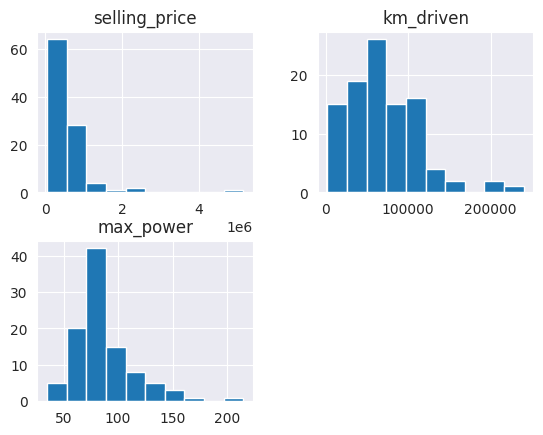

In [111]:
data.hist()

<Axes: >

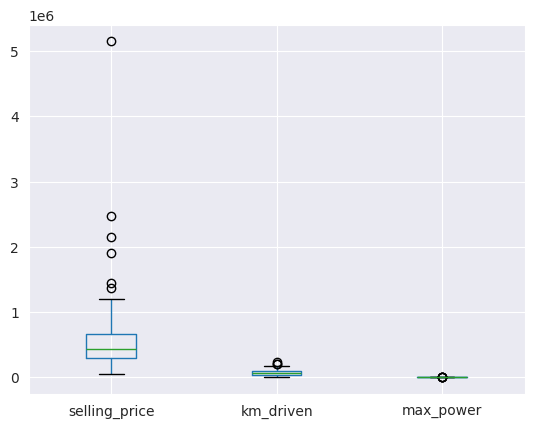

In [112]:
data.boxplot()

In [113]:

for i in ["selling_price","max_power","km_driven"]:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    outliers = data[(data[i] < Q1 - threshold * IQR) | (data[i] > Q3 + threshold * IQR)].index
    data.loc[outliers,i] = data[i].median()

<Axes: >

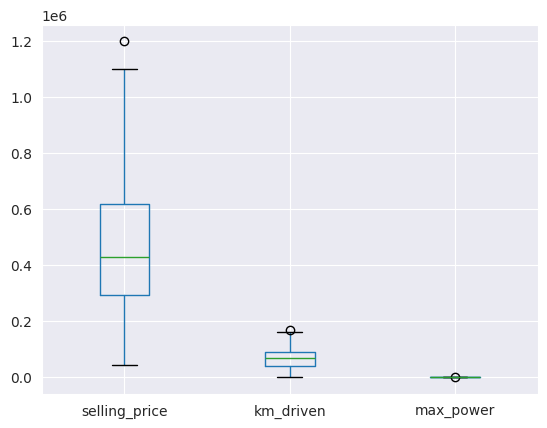

In [114]:
data.boxplot()

In [115]:
data=data.drop("transmission",axis=1)
for i in data.columns:
    fitted_box_dataA, fitted_box_lambdaA = stats.yeojohnson(data[[i]])
    data[i]=fitted_box_dataA

array([[<Axes: title={'center': 'selling_price'}>,
        <Axes: title={'center': 'km_driven'}>],
       [<Axes: title={'center': 'max_power'}>, <Axes: >]], dtype=object)

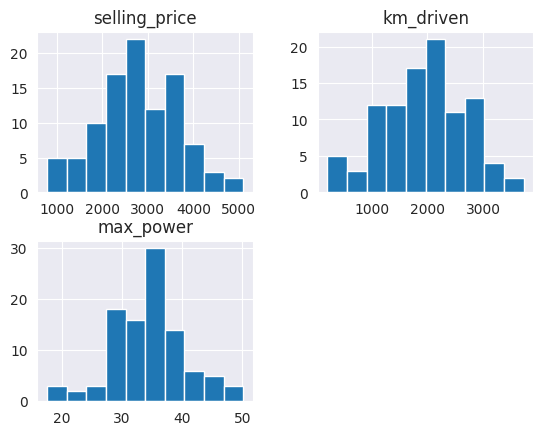

In [116]:
data.hist()

In [117]:
transf = MinMaxScaler((0,1))
transformedData = transf.fit_transform(data)
transformedData=pd.DataFrame(transformedData,columns=data.columns)

array([[<Axes: title={'center': 'selling_price'}>,
        <Axes: title={'center': 'km_driven'}>],
       [<Axes: title={'center': 'max_power'}>, <Axes: >]], dtype=object)

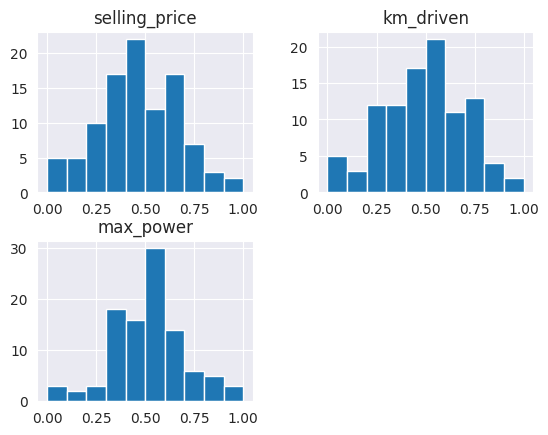

In [118]:
transformedData.hist()

<Axes: >

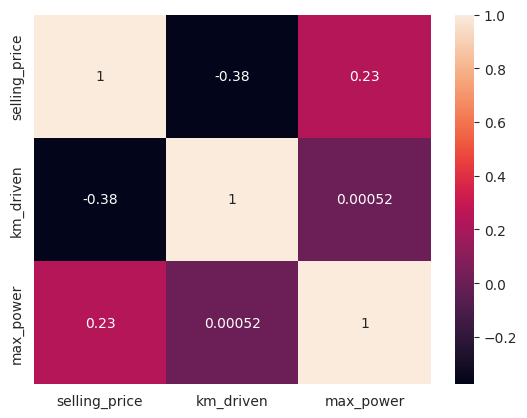

In [119]:
sns.heatmap(transformedData.select_dtypes(include=np.number).corr(method="spearman"),annot=True)

<Axes: >

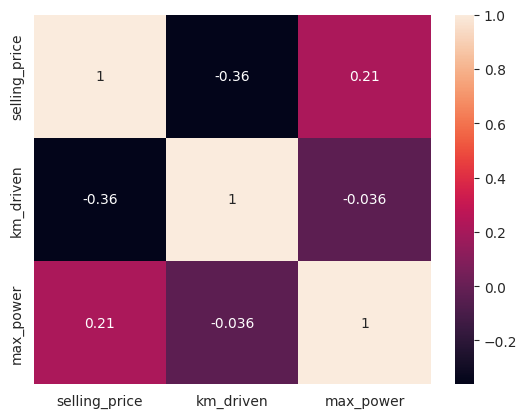

In [120]:
sns.heatmap(transformedData.select_dtypes(include=np.number).corr(method="pearson"),annot=True)

In [121]:
X=transformedData[["km_driven","max_power"]]
y=data["selling_price"]

In [122]:
model = LinearRegression().fit(X, y)
pred = model.predict(X)
temp = []
for x in range(len(transformedData["km_driven"])):
    temp.append([transformedData["km_driven"][x],transformedData["max_power"][x],pred[x]])
temp.sort(key=lambda x: x[0])

x1 = []
x2=[]
y_pred = []
for a in temp:
    x1.append(a[0])
    x2.append(a[1])
    y_pred.append(a[2])


In [123]:
mesh_size = .02
margin = 0

x1i = np.arange(transformedData["km_driven"].min()-margin, transformedData["km_driven"].max()+margin, mesh_size)
x2i = np.arange(transformedData["max_power"].min()-margin, transformedData["max_power"].max()+margin, mesh_size)
X1,X2= np.meshgrid(x1i,x2i)
input_data=np.c_[X1.ravel(),X2.ravel()]
input_data=pd.DataFrame(input_data,columns=["km_driven","max_power"])
pred = model.predict(input_data)
pred = pred.reshape(X1.shape)


In [124]:
mycolorscale = [[0, '#aa9ce2'],
                [1, '#aa9ce2']]


fig = go.Figure(data=[go.Scatter3d(x=x1, y=x2, z=y,mode='markers')])

fig.add_trace(go.Surface(x=x1i ,y=x2i, z=pred, colorscale=mycolorscale, showscale=False))

fig.update_layout(
                width=1000,
                height=1000,
                scene_camera_eye_z=1,scene_camera_eye_y=2)
fig.show()

POSSUM DATASET

The possum data frame consists of nine morphometric measurements on each of 104 mountain brushtail possums, trapped at seven sites from Southern Victoria to central Queensland.

case:observation number

site:The site number where the possum was trapped.

Pop:Population, either Vic (Victoria) or other (New South Wales or Queensland).

sex:Gender, either m (male) or f (female).

age:Age.

hdlngth:Head length, in mm.

skullw:Skull width, in mm.

totlngth:Total length, in cm.

taill:Tail length, in cm.

footlgth:foot length

earconch:ear conch length

eye:distance from medial canthus to lateral canthus of right eye 

chest:chest girth (in cm) 

belly:belly girth (in cm)


In [125]:
data=pd.read_csv("/home/batuhan-saylam/Desktop/cbddotasks/cbddotask3/possum.xls")
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


array([[<Axes: title={'center': 'case'}>,
        <Axes: title={'center': 'site'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'hdlngth'}>,
        <Axes: title={'center': 'skullw'}>,
        <Axes: title={'center': 'totlngth'}>],
       [<Axes: title={'center': 'taill'}>,
        <Axes: title={'center': 'footlgth'}>,
        <Axes: title={'center': 'earconch'}>],
       [<Axes: title={'center': 'eye'}>,
        <Axes: title={'center': 'chest'}>,
        <Axes: title={'center': 'belly'}>]], dtype=object)

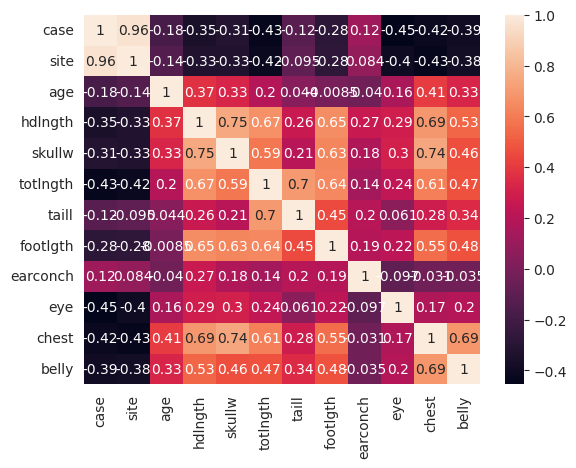

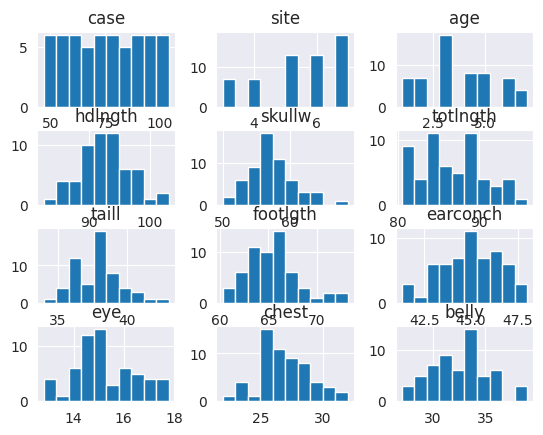

In [127]:
data4=data[(data["Pop"]=="other")].reset_index(drop=True)
sns.heatmap(data4.select_dtypes(include=np.number).corr(method="pearson"),annot=True)
data4.hist()

In [128]:
sum(data4.duplicated())

0

In [129]:
sum(data4.duplicated())

0

<Axes: >

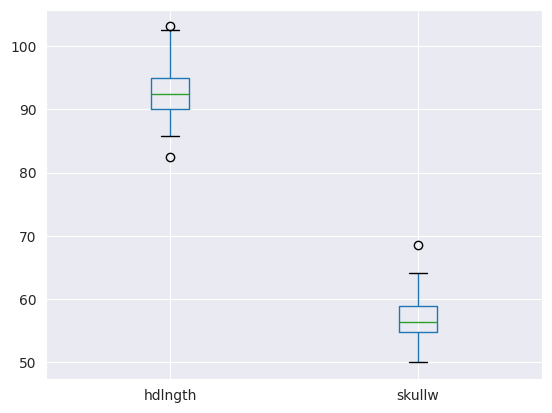

In [130]:
data4[["hdlngth","skullw"]].boxplot()

In [131]:
for i in ["hdlngth","skullw"]:
    Q1 = data4[i].quantile(0.25)
    Q3 = data4[i].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    outliers = data4[(data4[i] < Q1 - threshold * IQR) | (data4[i] > Q3 + threshold * IQR)].index
    data4.loc[outliers,i] = data4[i].median()

<Axes: >

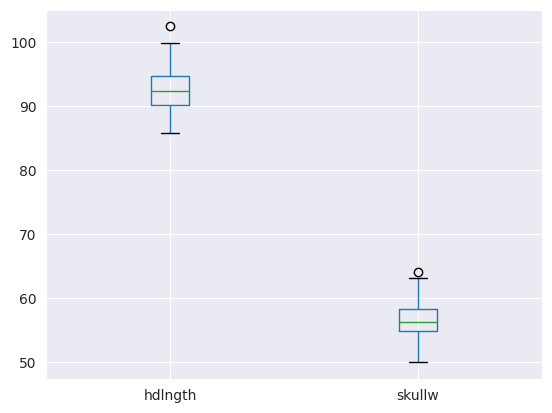

In [132]:
data4[["hdlngth","skullw"]].boxplot()

In [133]:
data4=data4[["hdlngth","skullw"]]

In [134]:
transf2 = PolynomialFeatures(2)
transformedData4 = transf2.fit_transform(data4[["hdlngth"]],data4[["skullw"]])
transf = MinMaxScaler((0,1))
transformedData4 = transf.fit_transform(transformedData4)

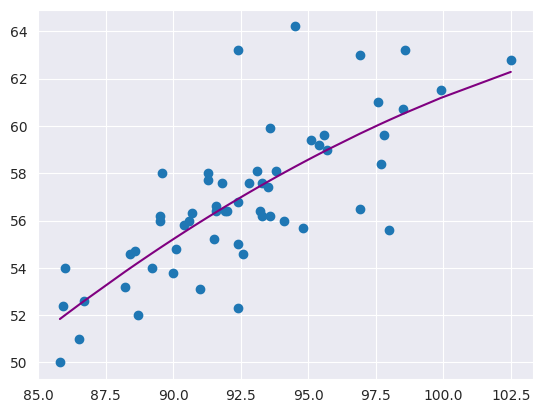

In [135]:
X=transformedData4
y=data4["skullw"]
model = LinearRegression().fit(X, y)
pred = model.predict(X)
temp = []
for x in range(len(data4["hdlngth"])):
    temp.append([data4["hdlngth"][x],pred[x]])
temp.sort(key=lambda x: x[0])
x = []
y_pred = []
for a in temp:
    x.append(a[0])
    y_pred.append(a[1])
plt.scatter(x = data4["hdlngth"], 
                y = data4["skullw"])
plt.plot(x, 
             y_pred, 
             color='purple')